In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Checking for null and duplicates**

In [5]:
print(f"Number of null values:\n{df.isnull().sum().sum()}")
print(f"number of duplicates:\n {df.duplicated().sum()}")

Number of null values:
0
number of duplicates:
 0


In [6]:
categorical_cols=df.select_dtypes(include='object').columns
print(categorical_cols.shape)

(5,)


# **Encoding categorical columns**

In [7]:
oe=OrdinalEncoder()
df[categorical_cols]=oe.fit_transform(df[categorical_cols])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,1.0,72,72,74
1,0.0,2.0,4.0,1.0,0.0,69,90,88
2,0.0,1.0,3.0,1.0,1.0,90,95,93
3,1.0,0.0,0.0,0.0,1.0,47,57,44
4,1.0,2.0,4.0,1.0,1.0,76,78,75


# **Checking Correlation Matrix to see the correlations and dependencies between the features**

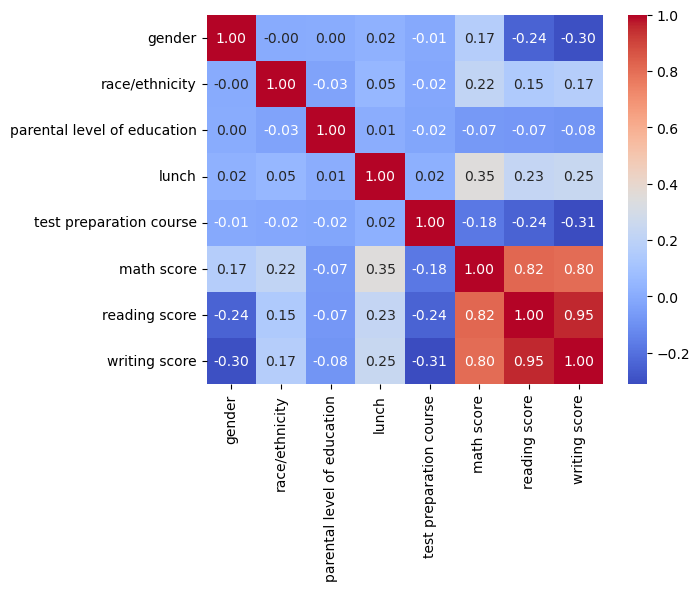

In [9]:
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,cmap="coolwarm",annot=True,fmt='0.2f')
plt.show()


# **Drop parental level of eduacation**


In [11]:
df=df.drop(columns=['parental level of education'])
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,72,72,74
1,0.0,2.0,1.0,0.0,69,90,88
2,0.0,1.0,1.0,1.0,90,95,93
3,1.0,0.0,0.0,1.0,47,57,44
4,1.0,2.0,1.0,1.0,76,78,75


# **Normalization**

In [12]:
sc=StandardScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,-0.964625,-1.015044,0.741881,0.746748,0.390024,0.193999,0.391492
1,-0.964625,-0.150441,0.741881,-1.339140,0.192076,1.427476,1.313269
2,-0.964625,-1.015044,0.741881,0.746748,1.577711,1.770109,1.642475
3,1.036672,-1.879647,-1.347925,0.746748,-1.259543,-0.833899,-1.583744
4,1.036672,-0.150441,0.741881,0.746748,0.653954,0.605158,0.457333


# **Split the data**

In [13]:
#Features and target
y=df['math score']
x=df.drop(columns=['math score'])
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=42)
x_test.head()

,gender,race/ethnicity,lunch,test preparation course,reading score,writing score
521,-0.964625,-0.150441,0.741881,0.746748,1.153370,1.049904
737,-0.964625,-1.015044,-1.347925,-1.339140,-0.217161,0.325651
740,1.036672,0.714162,0.741881,0.746748,0.262525,0.259809
660,1.036672,-0.150441,-1.347925,0.746748,0.536631,0.325651
411,1.036672,1.578765,0.741881,-1.339140,0.947790,0.654857


In [14]:
print(x_train.shape)
print(x_test.shape)

(900, 6)
(100, 6)


# **Linear Regression Models**

**Single feature linear Regression**

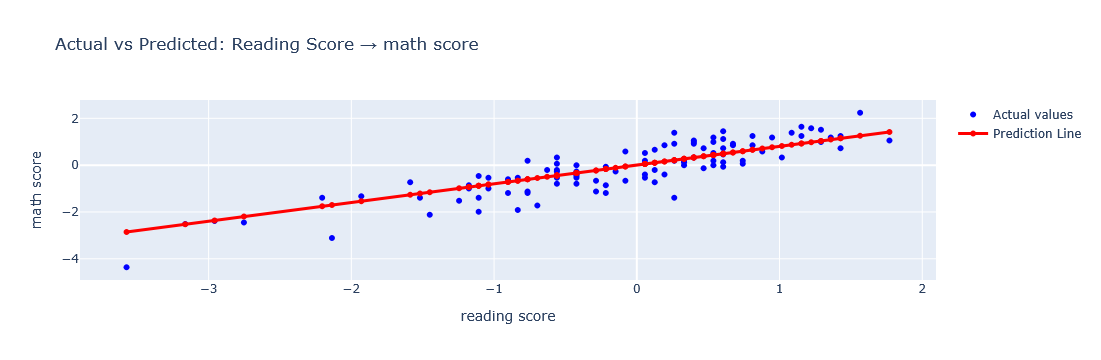

Single Linear Regression - R^2 Score:0.7450
Single Linear Regression - Mean Squared Error: 0.3327


In [17]:
import plotly.express as px
from sklearn.linear_model import LinearRegression

# Train single-feature model
feature = 'reading score'
x_single_train = x_train[[feature]]
x_single_test  = x_test[[feature]]

LR_single = LinearRegression()
LR_single.fit(x_single_train, y_train)
y_pred_single = LR_single.predict(x_single_test)

# --- 1. Scatter: Actual values (math score vs performance index) ---
fig = px.scatter(
    x=x_single_test.iloc[:, 0],           # math score
    y=y_test,                             # actual performance index
    color_discrete_sequence=['blue'],                        # color by actual value
    labels={'x': feature, 'y': 'math score'},
    title=f'Actual vs Predicted: {feature.title()} → math score'
)
fig.update_traces(name='Actual values',showlegend=True)
# --- 2. Add prediction line (math score vs predicted performance) ---
fig.add_scatter(
    x=x_single_test.iloc[:, 0],
    y=y_pred_single,
    mode='lines+markers',
    name='Prediction Line',
    line=dict(color='red', width=3)
)

# --- Show ---
fig.show()
r2_single=r2_score(y_test,y_pred_single)
mse_single=mean_squared_error(y_test,y_pred_single)
print(f"Single Linear Regression - R^2 Score:{r2_single:0.4f}")
print(f"Single Linear Regression - Mean Squared Error: {mse_single:0.4f}")

# **Multi feature linear regression**

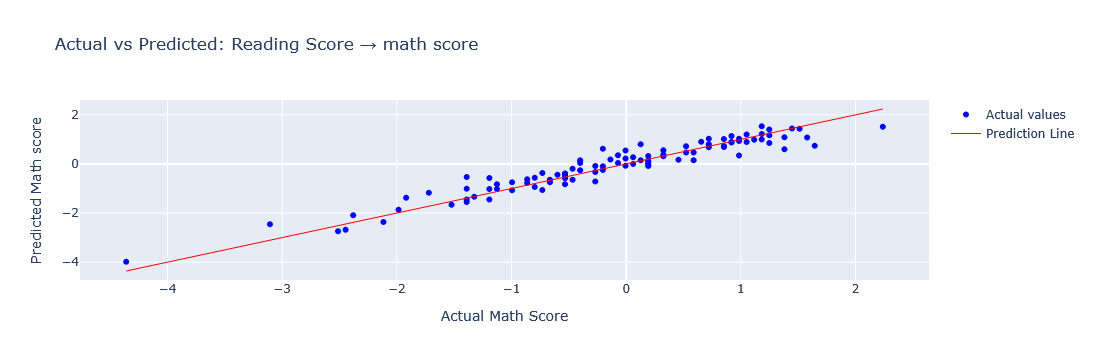

Single Linear Regression - R^2 Score:0.9215
Single Linear Regression - Mean Squared Error: 0.1024


In [24]:

LR_multi = LinearRegression()
LR_multi.fit(x_train, y_train)
y_pred_multi = LR_multi.predict(x_test)


fig = px.scatter(
    x=y_test,
    y=y_pred_multi,                             # actual performance index
    color_discrete_sequence=['blue'],
    labels={'x':'Actual Math Score','y':'Predicted Math score'},
    title=f'Actual vs Predicted: {feature.title()} → math score'
)
fig.update_traces(name='Actual values',showlegend=True)

# --- 2. Add prediction line (math score vs predicted performance) ---
fig.add_scatter(
    x=[y_test.min(),y_test.max()],
    y=[y_test.min(),y_test.max()],
    mode='lines',
    name='Prediction Line',
    line=dict(color='red', width=1)
)

# --- Show ---
fig.show()
r2_single=r2_score(y_test,y_pred_multi)
mse_single=mean_squared_error(y_test,y_pred_multi)
print(f"Single Linear Regression - R^2 Score:{r2_single:0.4f}")
print(f"Single Linear Regression - Mean Squared Error: {mse_single:0.4f}")